# Regression analysis: bivariate


###  Reference

- Book: "Estadistica Aplicada", *Julian de la Horra Navarro*.

In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Sample average
$ \overline{x} = \frac{1}{n} \sum_{i=0}^{n} x_{i} $

### Sample Variance

$ \nu_{x} = \frac{1}{n} \sum_{i=0}^{n} (x_{i} - \overline{x})^2 $

### Sample Covariance

$ cov_{x,y} = \frac{1}{n} \sum_{i=0}^{n} (x_{i} - \overline{x}) (y_{i} - \overline{y}) $

### Linear Regression

$ y = a + b x $

$ a = \overline{y} - \frac{cov_{x,y}}{\nu_{x}} \overline{x}$

$ b = \frac{cov_{x,y}}{\nu_{x}} $

### Sample correlation coefficient

$ r = \frac{cov_{x,y}}{ \sqrt{\nu_{y} \nu_{x}} } $

### Varianza Residual = Error Cuadratrico Medio (ECM)

$ ECM =  \nu_{y} ( 1 - r^2 ) $

In [2]:
# data sample 1
X = np.array([21,21,33,21,27,35,25,37,25,18,21,37,45,27,18,35])
Y = np.array([5,6,6,8,6,7,5,8,7,4,7,9,10,5,5,8])

# data sample 2 
Y = np.array([50,90,30,90,91,95,95])
X = np.array([0.5,0.9,0.4,0.7,1.1,0.75,0.8])

# data sample 3
X = np.array([1750,1800,1850,1900,1950])
X = X - 1750
Y = np.array([125, 187,274,423,594])

In [3]:
def cov(X, Y):
    return np.nanmean((X - np.nanmean(X)) * (Y - np.nanmean(Y)))
    # return np.cov(X,Y)[0][1]

def var(X):
    return np.nanmean((X - np.nanmean(X))**2)
    # return np.var(X)

In [4]:

def coefficients(X:np.array, Y:np.array)->(float, float):
    """
    Estimate regression line coefficents: y = a + b*x
    X -- independent variable.
    Y -- dependent variable.
    return -- coefficients (a, b)
    """
    # estimate coefficients
    a = np.nanmean(Y) - ( cov(X,Y) / var(X) ) * np.nanmean(X)
    b = cov(X,Y) / var(X)
    # return
    return (a, b)

def metrics(X:np.array, Y:np.array, y_hat:np.array)->(float, float):
    """
    Estimate regression line metrics: correlation coefficient, residual variance (Mean Square Error)
    X -- independent variable.
    Y -- dependent variable.
    y -- estimated variable.
    return -- coefficients (r, mse)
    """
    # correlation coefficient
    r = np.cov(X,Y)[0][1] / np.sqrt(np.var(X) * np.var(Y))
    # mean square error
    #mse = np.var(Y) * ( 1 - r**2 )
    mse = np.mean((Y - reg(X))**2)
    # return
    return r, mse

In [5]:
## linear regression: y = a + b * x
def linear_regression(X, Y):
    # copy data
    X1 = X.copy()
    Y1 = Y.copy()
    # estimate coefficients
    a1, b1 = coefficients(X1, Y1)
    # equation
    seq1 = "y = %.3f + %.3f * x "%(a1, b1)
    reg1 = lambda x: a1 + b1 * x 
    # metrics
    Y1hat = reg1(X1)
    r1 = cov(Y1hat,Y1) / np.sqrt(var(Y1hat) * var(Y1))
    mse1 = np.nanmean((Y1 - reg1(X1))**2)
    # return
    return r1, mse1, reg1, seq1


## logaritmic regression: y = a + b * log(x)
def logaritmic_regression(X, Y):
    # copy data
    X2 = np.log(X)
    Y2 = Y.copy()
    # validate
    i = np.where(~np.isinf(X2))[0]
    X2 = X2[i]
    Y2 = Y2[i]
    # estimate coefficients
    a2, b2 = coefficients(X2, Y2)
    # equation
    seq2 = "y = %.3f + %.3f * log(x) "%(a2, b2)
    reg2 = lambda x: a2 + b2 * np.log(x) 
    # metrics
    Y2hat = reg2(X2)
    r2 = cov(Y2hat,Y2) / np.sqrt(var(Y2hat) * var(Y2))
    mse2 = np.nanmean((Y[i] - reg2(X[i]))**2)
    # return 
    return r2, mse2, reg2, seq2


## # exponential regression: y = a * exp(b * x) --> log(y) = log(a) + b * x
def exponential_regression(X, Y):
    # copy data
    X3 = X.copy()
    Y3 = np.log(Y)
    # validate
    i = np.where(~np.isinf(Y3))[0]
    X3 = X3[i]
    Y3 = Y3[i]
    # estimate coefficients
    a3, b3 = coefficients(X3, Y3)
    a3 = np.exp(a3)
    # equation
    seq3 = "y = %.3f * exp( %.3f * x ) "%(a3, b3)
    reg3 = lambda x: a3 * np.exp(b3 * x)
    # metrics
    Y3hat = reg3(X3)
    r3 = cov(Y3hat,Y3) / np.sqrt(var(Y3hat) * var(Y3))
    mse3 = np.nanmean((Y[i] - reg3(X[i]))**2)
    # return
    return r3, mse3, reg3, seq3


## polynomial regression: y = a + b * x
def polylinomial_regression(X, Y, ndegree):
    # copy data
    X1 = X.copy()
    Y1 = Y.copy()
    # generate coefficients for polynomial function 
    coefficients = np.polyfit(X1, Y1, ndegree)
    # Generating model with the given weights
    model = np.poly1d(coefficients)
    # equation
    xeq = " + ".join(['%.3f * x^%s'%(c,n) if n>0 else '%.3f'%(c) for c, n in zip(coefficients, np.arange(ndegree,-1,-1))])
    seq1 = "y = %s"%(xeq)
    reg1 = model
    # metrics
    Y1hat = reg1(X1)
    r1 = cov(Y1hat,Y1) / np.sqrt(var(Y1hat) * var(Y1))
    mse1 = np.nanmean((Y1 - reg1(X1))**2)
    # return
    return r1, mse1, reg1, seq1

linear:  r = 0.980 / mse = 1137.120 / y = 85.800 + 2.348 * x 
log:     r = 0.928 / mse = 2640.245 / y = -949.308 + 280.208 * log(x) 
exp:     r = 0.970 / mse = 70.469 / y = 125.799 * exp( 0.008 * x ) 
poly(2): r = 1.000 / mse = 17.120 / y = 0.008 * x^2 + 0.748 * x^1 + 125.800
y = 0.008 * x^2 + 0.748 * x^1 + 125.800
r = 1.000 / mse = 17.120


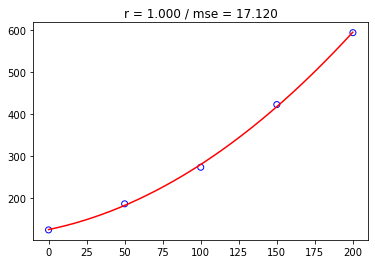

In [6]:
# estimate regressions
r1, mse1, reg1, seq1 = linear_regression(X, Y)
r2, mse2, reg2, seq2 = logaritmic_regression(X, Y)
r3, mse3, reg3, seq3 = exponential_regression(X, Y)
r4, mse4, reg4, seq4 = polylinomial_regression(X, Y, 2)


# display
print("linear:  r = %.3f / mse = %.3f / %s"%(r1, mse1, seq1))
print("log:     r = %.3f / mse = %.3f / %s"%(r2, mse2, seq2))
print("exp:     r = %.3f / mse = %.3f / %s"%(r3, mse3, seq3))
print("poly(2): r = %.3f / mse = %.3f / %s"%(r4, mse4, seq4))

# minimum error
min_mse = np.nanmin([mse1, mse2, mse3, mse4])

# select best fit
if min_mse == mse1:
    # equation
    seq = seq1
    reg = reg1
    # metrics
    r, mse = r1, mse1
elif min_mse == mse2:
    # equation
    seq = seq2
    reg = reg2
    # metrics
    r, mse = r2, mse2    
elif min_mse == mse3:
    # equation
    seq = seq3
    reg = reg3
    # metrics
    r, mse = r3, mse3
elif min_mse == mse4:
    # equation
    seq = seq4
    reg = reg4
    # metrics
    r, mse = r4, mse4
else:
    seq = ""
    r, mse = np.nan, np.nan

# display
print(seq)
print("r = %.3f / mse = %.3f"%(r, mse))

# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X,Y, color = "blue", facecolor='None')
xi = np.arange(np.min(X),np.max(X),0.1)
yi = reg(xi)
ax.plot(xi, yi, color = "red")
ax.set_title("r = %.3f / mse = %.3f"%(r, mse))
plt.show()